In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

78.19722583751911 -89.6877464555484
20.82339351602627 107.2334971871025
-13.71832286341295 114.41791824881534
36.492870951423996 -33.39819686121231
14.262094751725073 26.82899927929398
37.391130586717594 -5.602112381280364
-46.61764379520617 173.32285871406373
-72.45868612338377 -98.91187408160656
56.123070173342626 24.671542889360097
-36.42155154327531 -164.43358734915262
44.4696148207577 10.168750047621785
61.85185023515001 -16.59706299480004
79.30528072675733 114.40749015867254
-32.89488302664697 -50.321384794431395
78.80946114471487 75.0810309883766
-47.57542813647795 -38.848658131439265
-89.02680182449313 -129.8718017704119
-27.48151043865674 -88.26886373490164
-69.67153928856249 -107.50018883331644
22.109125396979834 8.147620311313403
-66.4764268139213 152.64157065865874
-24.237495775500847 -50.88772622101669
32.84916388174311 167.15114134953524
51.38505748263745 -59.64718586344527
9.90584070579986 37.224492644807896
-40.64329888187442 -35.59852072099491
1.719348381849386 -13.904

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
%store -r url

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff7b206e9c5940dee6edcf0b6d1f04f3&q=Boston


In [10]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1659416466.2572958

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
  # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | hong gai
Processing Record 3 of Set 1 | denpasar
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | umm kaddadah
Processing Record 6 of Set 1 | carmona
Processing Record 7 of Set 1 | waitati
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | birzai
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | fivizzano
Processing Record 12 of Set 1 | hofn
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | rio grande
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | coquimbo
Processing Record 19 of Set 1 | arlit
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | ortigueira
Processing Record 22 of Set 1 | severo-kurilsk
Processing Record 23 of Set 1 | saint-august

Processing Record 38 of Set 4 | kuching
Processing Record 39 of Set 4 | juniyah
City not found. Skipping...
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | jieshou
Processing Record 42 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | terrace
Processing Record 45 of Set 4 | sambava
Processing Record 46 of Set 4 | jiuquan
Processing Record 47 of Set 4 | pitsunda
Processing Record 48 of Set 4 | paamiut
Processing Record 49 of Set 4 | macamic
Processing Record 50 of Set 4 | cairns
Processing Record 1 of Set 5 | gizo
Processing Record 2 of Set 5 | pisco
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | manicore
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | alwaye
Processing Record 7 of Set 5 | ahipara
Processing Record 8 of Set 5 | georgetown
Processing Record 9 of Set 5 | lagoa
Processing Record 10 of Set 5 | 

Processing Record 27 of Set 8 | fort morgan
Processing Record 28 of Set 8 | tilichiki
Processing Record 29 of Set 8 | esperanza
Processing Record 30 of Set 8 | sorvag
City not found. Skipping...
Processing Record 31 of Set 8 | esso
Processing Record 32 of Set 8 | nyarlorinc
Processing Record 33 of Set 8 | rupert
Processing Record 34 of Set 8 | tautira
Processing Record 35 of Set 8 | hambantota
Processing Record 36 of Set 8 | saint anthony
Processing Record 37 of Set 8 | bolshevik
Processing Record 38 of Set 8 | evensk
Processing Record 39 of Set 8 | aripuana
Processing Record 40 of Set 8 | jiangyou
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | macklin
Processing Record 43 of Set 8 | ikalamavony
Processing Record 44 of Set 8 | maumere
Processing Record 45 of Set 8 | bonthe
Processing Record 46 of Set 8 | yangcun
Processing Record 47 of Set 8 | guerrero negro
Processing Record 48 of Set 8 | bargal
City not found. Skipping...
Processing Record 49 of Set 8 |

Processing Record 14 of Set 12 | tupaciguara
Processing Record 15 of Set 12 | bafq
Processing Record 16 of Set 12 | rawah
Processing Record 17 of Set 12 | shelburne
Processing Record 18 of Set 12 | den helder
Processing Record 19 of Set 12 | ostrovnoy
Processing Record 20 of Set 12 | malwan
City not found. Skipping...
Processing Record 21 of Set 12 | havoysund
Processing Record 22 of Set 12 | turukhansk
Processing Record 23 of Set 12 | pietersburg
Processing Record 24 of Set 12 | staraya kulatka
Processing Record 25 of Set 12 | neuquen
Processing Record 26 of Set 12 | toamasina
Processing Record 27 of Set 12 | madimba
Processing Record 28 of Set 12 | smithers
Processing Record 29 of Set 12 | vraca
Processing Record 30 of Set 12 | bahia de caraquez
Processing Record 31 of Set 12 | nanyamba
Processing Record 32 of Set 12 | miles city
Processing Record 33 of Set 12 | male
Processing Record 34 of Set 12 | acurenam
Processing Record 35 of Set 12 | svetlogorsk
Processing Record 36 of Set 12 

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,42.26,65,38,5.97,GL,2022-08-02 05:01:06
1,Hong Gai,20.9560,107.0946,89.51,60,69,7.70,VN,2022-08-02 05:01:07
2,Denpasar,-8.6500,115.2167,83.86,83,40,12.66,ID,2022-08-02 05:00:15
3,Ribeira Grande,38.5167,-28.7000,73.96,74,3,11.65,PT,2022-08-02 05:01:08
4,Umm Kaddadah,13.6017,26.6876,74.98,70,28,12.66,SD,2022-08-02 05:01:09
5,Carmona,14.3000,121.0167,86.67,75,100,1.92,PH,2022-08-02 05:01:10
6,Waitati,-45.7500,170.5667,53.11,55,62,6.80,NZ,2022-08-02 05:01:10
7,Punta Arenas,-53.1500,-70.9167,46.11,61,100,15.21,CL,2022-08-02 05:00:58
8,Birzai,56.2000,24.7500,57.88,92,4,5.28,LT,2022-08-02 05:01:11
9,Avarua,-21.2078,-159.7750,75.25,60,100,6.91,CK,2022-08-02 05:01:12


In [13]:
# new_column_order = ["column2", "column4", " column1"]
# df = (new_column_order)

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1659417535.5849245

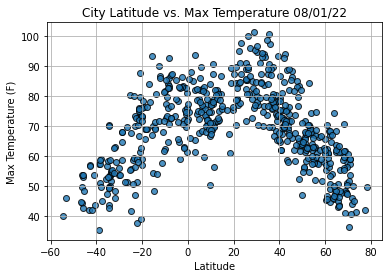

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

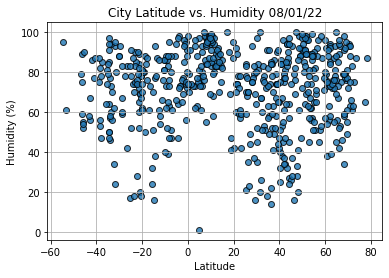

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

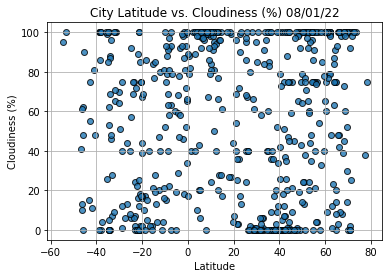

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

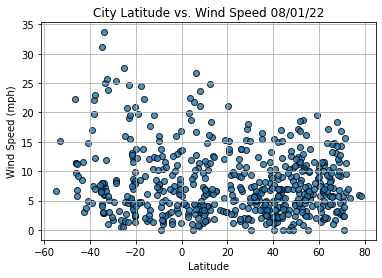

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [53]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [54]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [55]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [56]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

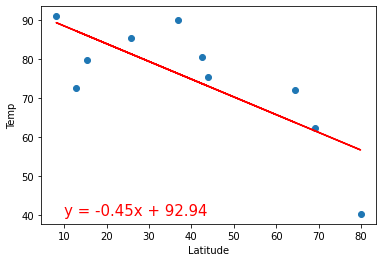

In [57]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [4]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

IndentationError: expected an indented block (755688848.py, line 3)

In [62]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [64]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,42.26,65,38,5.97,GL,2022-08-02 05:01:06
1,Hong Gai,20.9560,107.0946,89.51,60,69,7.70,VN,2022-08-02 05:01:07
3,Ribeira Grande,38.5167,-28.7000,73.96,74,3,11.65,PT,2022-08-02 05:01:08
4,Umm Kaddadah,13.6017,26.6876,74.98,70,28,12.66,SD,2022-08-02 05:01:09
5,Carmona,14.3000,121.0167,86.67,75,100,1.92,PH,2022-08-02 05:01:10
...,...,...,...,...,...,...,...,...,...
562,Buchanan,5.8808,-10.0467,74.82,83,100,10.27,LR,2022-08-02 05:17:02
563,Klyuchi,52.2667,79.1667,70.50,63,65,8.50,RU,2022-08-02 05:17:03
564,Rotterdam,51.9225,4.4792,62.89,74,97,8.05,NL,2022-08-02 05:13:20
566,Kahului,20.8947,-156.4700,78.82,70,40,13.80,US,2022-08-02 05:17:04


In [65]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,42.26,65,38,5.97,GL,2022-08-02 05:01:06
1,Hong Gai,20.9560,107.0946,89.51,60,69,7.70,VN,2022-08-02 05:01:07
3,Ribeira Grande,38.5167,-28.7000,73.96,74,3,11.65,PT,2022-08-02 05:01:08
4,Umm Kaddadah,13.6017,26.6876,74.98,70,28,12.66,SD,2022-08-02 05:01:09
5,Carmona,14.3000,121.0167,86.67,75,100,1.92,PH,2022-08-02 05:01:10


In [68]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

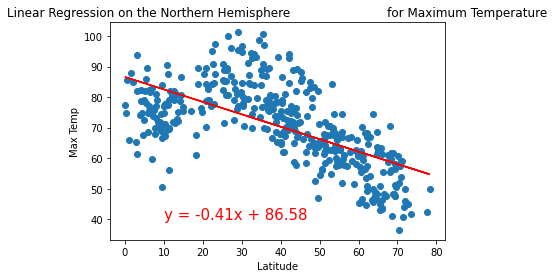

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

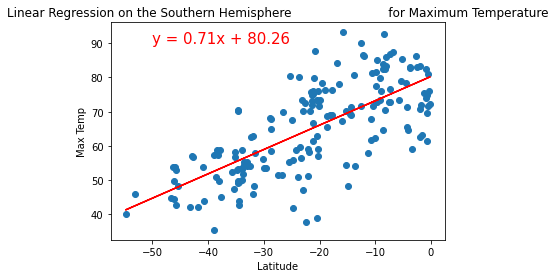

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

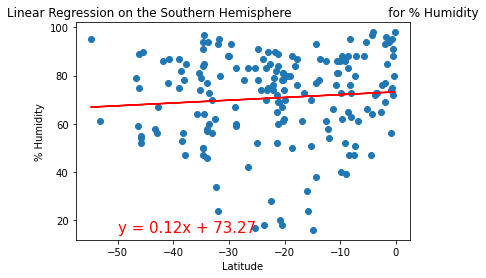

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

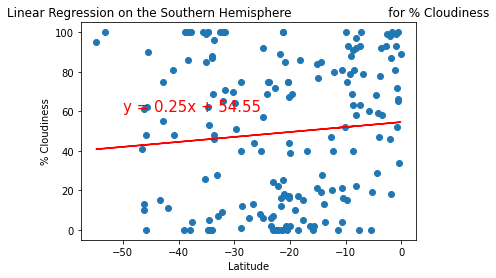

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

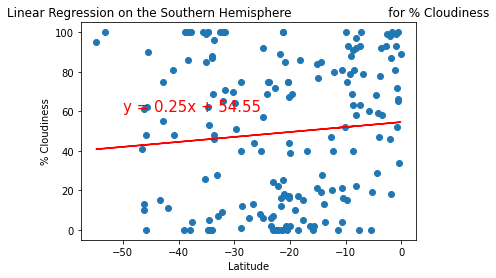

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

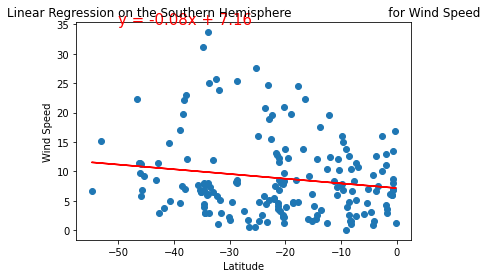

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))